#1. Download and Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Image Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
xtrain=train_datagen.flow_from_directory('/content/drive/MyDrive/nalayathiran/flowers1/train',
                                         target_size=(64,64),
                                         class_mode='categorical', batch_size=100)

Found 3460 images belonging to 5 classes.


In [9]:
xtest=train_datagen.flow_from_directory('/content/drive/MyDrive/nalayathiran/flowers1/test',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                        batch_size=100)

Found 436 images belonging to 5 classes.


#3. Create Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

#4. Add Layers(Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)


In [11]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

#5. Compile The Model

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 6. Fit The Model

In [13]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=30,validation_data=xtest,validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
35/35 [==============================] - 30s 482ms/step - loss: 1.8455 - accuracy: 0.3390 - val_loss: 1.2349 - val_accuracy: 0.4748
Epoch 2/30
35/35 [==============================] - 17s 477ms/step - loss: 1.1474 - accuracy: 0.5217 - val_loss: 1.1045 - val_accuracy: 0.5734
Epoch 3/30
35/35 [==============================] - 18s 514ms/step - loss: 1.0593 - accuracy: 0.5757 - val_loss: 1.1012 - val_accuracy: 0.5344
Epoch 4/30
35/35 [==============================] - 17s 484ms/step - loss: 1.0108 - accuracy: 0.6052 - val_loss: 1.0213 - val_accuracy: 0.5940
Epoch 5/30
35/35 [==============================] - 17s 482ms/step - loss: 0.9668 - accuracy: 0.6162 - val_loss: 1.0148 - val_accuracy: 0.6032
Epoch 6/30
35/35 [==============================] - 17s 486ms/step - loss: 0.9007 - accuracy: 0.6488 - val_loss: 1.0003 - val_accuracy: 0.5963
Epoch 7/30
35/35 [==============================] - 17s 481ms/step - loss: 0.8738 - accuracy: 0.6653 - val_loss: 0.9547 - val_accuracy: 0.6261

# 7. Save The Model

In [19]:
model.save('/content/drive/MyDrive/nalayathiran/FlowersModel.h5')

# 8. Test The Model

In [20]:
from tensorflow.keras.preprocessing import image

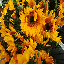

In [21]:
img=image.load_img('/content/drive/MyDrive/nalayathiran/flowers1/test/sunflower/12282924083_fb80aa17d4_n.jpg',target_size=(64,64))
img 

In [17]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [18]:
op=['Daisy','Dandelion','Rose','Sunflower','Tulip']
pred=np.argmax(model.predict(x)) 

op[pred]

'Sunflower'